
# Project: Investigate a Dataset - No Show Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset (No Show Appointments dataset) is a collection of data gotten from Brazilian medical records showing medical appointments (up to 1105270) and 14 associating variables. 

The different variables represented in the data set include:

>  **Patient ID:**  
Shows the patients IDs (in numbers) for all appointments booked.
>
>  **AppointmentID:**  
Gives record of the IDs assigned to patients after an appointment has been booked.
>
>  **Gender:**  
This column specifies if the patient is a male or female.
>
>  **ScheduledDay:**  
This column gives information on the day and time that the patient called/walked in to book/set up an appointment. This day should normally be before the AppointmentDay.
>
>  **AppointmentDay:**  
A column showing the days appointed to the patients from the facility to come in for medical assistance.
>
>  **Age:**  
Indicating how old the patient is. Ranging from babies to elderly people.
>
>  **Neighbourhood:**  
The location of the hospital where the appointment was booked for.
>
>  **Scholarship:**  
Indicates whether the patient is enrolled under the [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) scholarship which provides financial aid to poor Brazilian families. Represented in binary.
>
>  **Hipertension:**  
Is the patient hypertensive or not? Also represented in binary.
>
>  **Diabetes:**  
Information on the diabetic status of the patient.
>
>  **Alcoholism:**  
Is the patient and alcoholic?
>
>  **Hancap:**  
Does the patient have any disability?
>
>  **SMS_received:**  
Gives information as to whether a patient was sent an SMS as a verification/reminder of the booked appointment.
>
>  **No-show:**  
Appearing as **Yes** or **No**, where **No** means the patient showed up for the appointment, and **Yes** means the patient did not show up for the appointment.


### Question(s) for Analysis

The main aim for this analysis is to investigate the important factors to consider in order to predict whether a patient will show up for their scheduled appointment or not?  
With this being said, the two questions that I will be investigating will be:  

+ **Does the waiting interval affect the rate of no show?**  
In this analysis, a new column will be introduced, **waiting_period**, which represents the number of days between the day the appointment was booked (ScheduledDay) and the day of the medical appointment (AppointmentDay).  
The waiting_period will then be analyzed to see if it has any effect on the patients appointment No-show status.


+ **What other factors are important in the prediction of a patient's No-show status?**  
Other important columns (after dropping some columns) will be used as independent variables, and the No-show column used as the dependent variable in analysing which information or set of information is most suitable for predicting if a patient will show up for their appointment.

<a id='wrangling'></a>
## Data Wrangling  

In this section, the dataset and packages needed will be imported and loaded.  
The data set will then be analysed for missing datas, null datas, and other errors that the dataset may have and will later be cleaned based on the errors found.

### Loading packages and data  

The python packages required for comprehensive analysis and representation of results gotten from the dataframe are
+ **Pandas** for data analysis and cleaning  
+ **Numpy** for numerical computations
+ **Matplotlib** for data visualisation
+ **Seaborn** also for data visualisation  

In [1]:
# Importing packages needed for the analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Loading the data used for the analysis

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

### Data assessing  
Checking the dataset for errors using various operations.

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> This gives an insight into what the data looks like by showing the first 5 rows of the dataset with all its columns.  
This also helps to access if the dataframe is actually seperated by commas as a csv file as it is meant to.

In [4]:
df.shape

(110527, 14)

> Shows the size of the dataframe, (rows, columns).

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> Descriptive summary of the dataframe showing the count, mean, standard deviation, minimum and maximum, along with various percentiles for the numeric columns of the dataframe.

> From the above, we could observe some few outliers already. Age column having a minimum of -1 which is odd and Handcap having a max of 4 instead of 1. This will be taken care of later on.

In [6]:
df.describe(exclude=[np.number])

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


> Descriptive summary of the non numeric columns of the dataframe showing the row count, count of unique values, the top value with it's corresponding frequency.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> The `df.info()` code gives a general informative summary of the dataframe, showing the total number of entries (rows and columns), the number of enteries for each column (if there are any missing entries), and the type of data in each column.

> From the above, some few peculiarities seen were the day attributes which had object type and patientID which had a float type. 

In a dataset, there might be no missing values, but the dataset may have values that are either put in incorrectly (numbers where there are strings), or as Nan.  
This too has to be checked for for better cleaning.

In [8]:
df.isnull().values.any()

False

In [9]:
df.isnull().sum() 

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> `df.isnull().values.any()` and `df.isnull().sum() ` both are different operations for showing if there is a null entry in the dataset. The former giving a total analysis, **True** if there are null entries and **False** if there is no null entry, while the later shows the differnt columns and the number of null entries present.

> In both cases, it showed there were no null entries in our dataset

In [10]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> Gives the number of uniques values in each column. From this output, you can determine if a colum has duplicated entries or not. Although most of the columns appear to be duplicated, but the only columns that need to have unique numbers for each entry should be that of **PatientId** and **AppointmentID**.

In [11]:
df.duplicated('PatientId').sum()

48228

In [12]:
df.duplicated(['PatientId','AppointmentID']).sum()

0

> Further assesment was done for the number of duplicated entries in the two columns mentioned above.


### Data Cleaning 

After assessing the data, it was seen that the data had no missing values and no null values as well.  
However, the issues noticed after the assessment include:
+ Duplicated entries
+ Minimum age of -1 
+ Maximum Handcap value of 4
+ Mispelled and wrong capitalization of column headings
+ Dates not in datetime format
+ Patient_id is in float and not int64
+ Columns that may not be needed for the analysis


From further assessment done on the duplicated **PatientId** with that of the **AppointmentID**, the duplicated **PatientId** does not seem to be a problem as there are no duplicated rows having both **PatientId** and **AppointmentID** thus leading to the conclusion that a patient may have called in more than once to book for different appointments.

As seen in the `df.describe()` output, there is a minimum age of -1 which is impossible. A `df.Age.value_counts()` code was run to see the number of entries attached to this minimum value in order to determine the next step.

In [13]:
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [14]:
df = df[df.Age != -1]

> We have just 1 entry for the -1 age which is insignificant, therefore this entry was dropped. It might look like its also impossible to have ages of '0' but these entries will be left there with the assumption that babies not up to a year fall into that category.

The handcap column also shows a max value of 4 in a colum where its meant to be 1's and 0's. A bar chat was therefore made to see the distribution of the numbers involved.

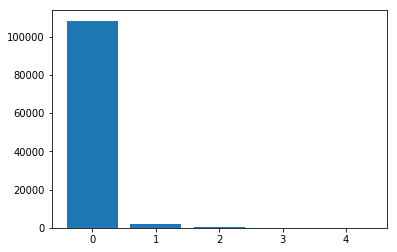

In [15]:
counts = df['Handcap'].value_counts().to_dict()
values = list(counts.keys())
count = list(counts.values())

plt.bar(range(len(counts)), count, tick_label=values)
plt.show()

In [16]:
counts

{0: 108285, 1: 2042, 2: 183, 3: 13, 4: 3}

> From the above barchat and the `counts` operation, it shows that the number of rows with numbers greater than 1 are not so many and can be dropped in order to not cause confusions. This was done in the next cell.

In [17]:
df = df[df.Handcap <= 1]

In [18]:
df.drop('AppointmentID', inplace=True, axis=1)
df.drop('PatientId', inplace=True, axis=1)

> The **AppointmentID** and **PatientId** columns were dropped as they will be of no importance to me in further analysis.

In [19]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182
std,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> Using the `df.describe()` operation again to confirm that the unwanted entries were actually dropped.

As seen in the column labels, some labels were misspelled, written wrongly with the use of capital letters and hyphen and also labeled with some confusing terms.  
Next step will be renaming the columns to names I can work with using the `df.rename` operation.

In [20]:
df.rename({'Gender' : 'gender', 'ScheduledDay' : 'booking_day', 'AppointmentDay' : 'appointment_day', 'Age' : 'age', 'Neighbourhood' :'neighbourhood', 'Scholarship' : 'scholarship', 'Hipertension' : 'hypertensive', 'Diabetes' : 'diabetic', 'Alcoholism' : 'alcoholic', 'Handcap' : 'disabled', 'SMS_received' : 'sms_received', 'No-show' : 'absent'}, axis=1, inplace=True)

> The renaming was mostly done to correct spelliungs and casings of the column names. Although two column names were totally changed and not just corrected for better context.
>> **Handcap** was changed to **disabled**  
>> **No-show** was changed to **absent**

In [21]:
df.head()

,gender,booking_day,appointment_day,age,neighbourhood,scholarship,hypertensive,diabetic,alcoholic,disabled,sms_received,absent
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> Checking that the newly named columns came out well.

In [22]:
df['booking_day'] = pd.to_datetime(df['booking_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

> The **booking_day** and **appointment_day** appeared as objects in the dataframe, thus they were changed to datetime64[ns] type for better analysis.

In [23]:
df['scholarship'] = df['scholarship'].astype(bool)
df['hypertensive'] = df['hypertensive'].astype(bool)
df['diabetic'] = df['diabetic'].astype(bool)
df['alcoholic'] = df['alcoholic'].astype(bool)
df['disabled'] = df['disabled'].astype(bool)
df['sms_received'] = df['sms_received'].astype(bool)
df['neighbourhood'] = df['neighbourhood'].astype('category')

> The entries that were inputted in binary were changed to boolean and the **neighbourhood** column was changed to categorical form for better understanding and analysis.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 12 columns):
gender             110327 non-null object
booking_day        110327 non-null datetime64[ns]
appointment_day    110327 non-null datetime64[ns]
age                110327 non-null int64
neighbourhood      110327 non-null category
scholarship        110327 non-null bool
hypertensive       110327 non-null bool
diabetic           110327 non-null bool
alcoholic          110327 non-null bool
disabled           110327 non-null bool
sms_received       110327 non-null bool
absent             110327 non-null object
dtypes: bool(6), category(1), datetime64[ns](2), int64(1), object(2)
memory usage: 5.8+ MB


In [25]:
df.head()

,gender,booking_day,appointment_day,age,neighbourhood,scholarship,hypertensive,diabetic,alcoholic,disabled,sms_received,absent
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,No


> Time did not show in the **appointment_day** column because there was no specific time indicated. The appointment was probally a walk-in appointment or based on first-come-first-serve basis.

In [26]:
df.describe()

,age
count,110327.000000
mean,37.070753
std,23.098052
min,0.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


In [27]:
df.describe(exclude=[np.number])

,gender,booking_day,appointment_day,neighbourhood,scholarship,hypertensive,diabetic,alcoholic,disabled,sms_received,absent
count,110327,110327,110327,110327,110327,110327,110327,110327,110327,110327,110327
unique,2,103368,27,81,2,2,2,2,2,2,2
top,F,2016-05-06 07:09:54,2016-06-06 00:00:00,JARDIM CAMBURI,False,False,False,False,False,False,No
freq,71730,24,4686,7717,99484,88611,102427,106975,108285,74892,88049
first,NaN,2015-11-10 07:13:56,2016-04-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2016-06-08 20:07:23,2016-06-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> The above 4 cells are just assessing operations run again to confirm that changes have been applied and the dataframe cleaned and ready for use.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Does the waiting interval affect the rate of no show?

To answer this question, a new column containing the interval (difference) between the **appointmen_day** and the **booking_day** has to be created to work with. This new column will be labeled **waiting_period**.

In [28]:
df['waiting_period'] = df['appointment_day'].dt.date.sub(df['booking_day'].dt.date, axis=0)

In [29]:
df.head()

,gender,booking_day,appointment_day,age,neighbourhood,scholarship,hypertensive,diabetic,alcoholic,disabled,sms_received,absent,waiting_period
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,No,0 days
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,No,0 days
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,No,0 days
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,No,0 days
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,No,0 days


> The **waiting_period** was set to be displayed in days using `dt.date` and not hours for easier working and analysis.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 13 columns):
gender             110327 non-null object
booking_day        110327 non-null datetime64[ns]
appointment_day    110327 non-null datetime64[ns]
age                110327 non-null int64
neighbourhood      110327 non-null category
scholarship        110327 non-null bool
hypertensive       110327 non-null bool
diabetic           110327 non-null bool
alcoholic          110327 non-null bool
disabled           110327 non-null bool
sms_received       110327 non-null bool
absent             110327 non-null object
waiting_period     110327 non-null timedelta64[ns]
dtypes: bool(6), category(1), datetime64[ns](2), int64(1), object(2), timedelta64[ns](1)
memory usage: 6.6+ MB


> As seen in the output above, the waiting_period column is in timedelta64[ns] format and will be difficult to work with.  
  
To plot and explore the relationship between waiting time and patient's turn up, we have to change the waiting_time data type from timedelta64[ns] to int64.  
This action is done in the code in the next cell.

In [31]:
df['waiting_period'] = df['waiting_period'].dt.days

In [32]:
df['waiting_period'].describe()

count    110327.000000
mean         10.186971
std          15.257836
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting_period, dtype: float64

> A brief check on the description for the column. As seen, the minimum value in the column is **-6**. This can only happen if a patient called in and was given a date that has already passed or there was a mix up between their **booking_day** and **appointmnet_day**. Futher assessing will determine if the number of entries falling under the negative side of the number line will be dropped or worked on.

In [33]:
df.waiting_period.value_counts()

 0      38485
 2       6712
 4       5279
 1       5204
 7       4904
 6       4028
 5       3266
 14      2906
 3       2730
 8       2328
 21      1859
 28      1704
 13      1681
 9       1605
 15      1501
 10      1388
 20      1184
 22      1171
 16      1148
 12      1113
 17      1105
 29      1087
 19      1043
 18      1017
 27      1012
 11       987
 35       962
 23       820
 34       806
 26       730
        ...  
 98         5
 112        5
 103        5
 109        5
 108        5
 102        4
-1          4
 105        4
 96         4
 119        4
 122        3
 92         3
 115        2
 93         2
 110        2
 107        2
 97         2
 94         2
 123        1
 101        1
 126        1
 125        1
 139        1
 151        1
 132        1
 117        1
 146        1
 82         1
-6          1
 127        1
Name: waiting_period, Length: 131, dtype: int64

In [34]:
df[df.waiting_period <= -1].count()

gender             5
booking_day        5
appointment_day    5
age                5
neighbourhood      5
scholarship        5
hypertensive       5
diabetic           5
alcoholic          5
disabled           5
sms_received       5
absent             5
waiting_period     5
dtype: int64

In [35]:
df[df.waiting_period <= -1]

,gender,booking_day,appointment_day,age,neighbourhood,scholarship,hypertensive,diabetic,alcoholic,disabled,sms_received,absent,waiting_period
27033,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,False,False,False,False,True,False,Yes,-1
55226,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,False,False,False,False,True,False,Yes,-1
64175,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,False,False,False,False,False,False,Yes,-1
71533,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,False,False,False,False,False,False,Yes,-6
72362,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,False,False,False,False,False,False,Yes,-1


> The`.count()` operations show that the number of entries falling below zero are just 5 and not significant enough to cause issues while analysing further and will therefore not be dropped.  
It is also seen that all patients falling into this category did not show up for their appointments which is a very valid reason as the date given to them had already passed.

#### Plotting

All plots that will be needed for the analysis of this question will then be done below.

In [36]:
no_show = df['absent'] == "Yes"
show = df['absent'] == "No"

> The absent column was filtered by its 2 unique enteries, **Yes** and **No** into two seperate dataframes which will be used as a parameter in our plots to visialize the effects of other variables on the attendance. So, we can clearly see those that attened or not.

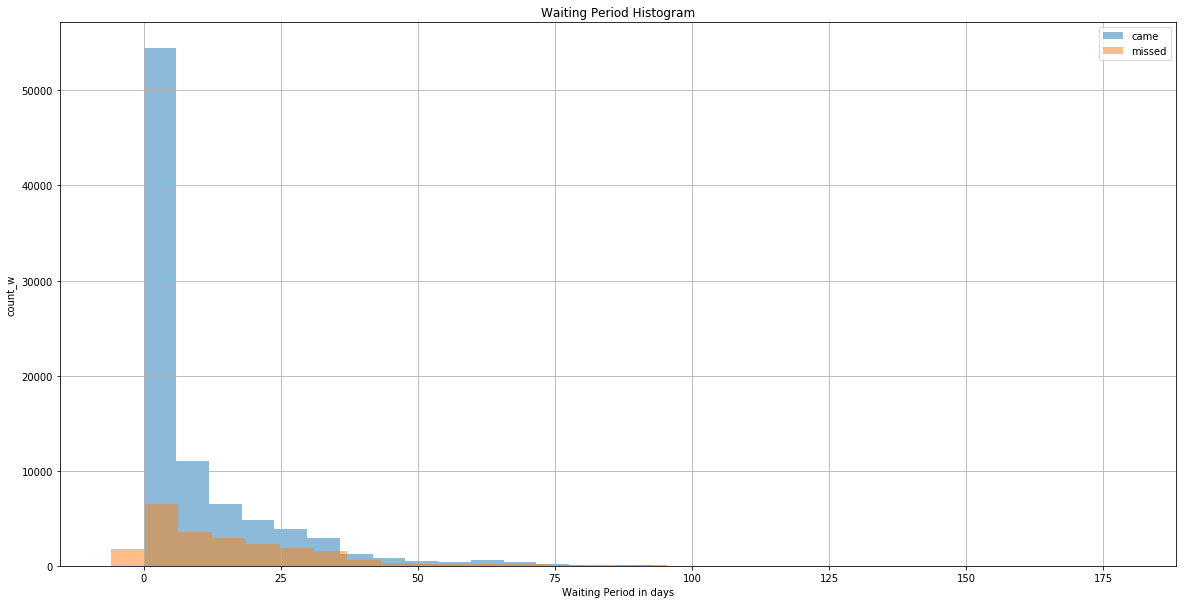

In [37]:
plt.figure(figsize=(20,10))
df[show].waiting_period.hist(alpha=0.5, bins=30,label='came')
df[no_show].waiting_period.hist(alpha=0.5, bins=30,label='missed')
plt.legend();
plt.title("Waiting Period Histogram")
plt.xlabel("Waiting Period in days")
plt.ylabel('count_w');

> The above is a histogram plot showing the relationship between the waiting period and the attendance of patients to their appointmnets.  
From this plot, 3 things can be observed:
+ The patients that fell into the negative number line on the waiting period axis did not show up at all, which is expected as their appointment days had already passed.
+ Patients with shorter waiting period (between 0 to 10 days) had a greater number of people showing up for their appointments than those that were absent.
+ For patients with longer waiting period (10 days and above), the ratios of those that missed their appointments to those that came in for their appointments are almost equal when compared based on the number of people that were booked for that period.  

More plots and operations will be done to investigate the question further.

The below operation shows the count of the **absent** column in numbers and divided into bins of 10s.

In [38]:
bins=[0,10,20,30,40,50,60,70,80,90,100,120,140,160,180]
df['waiting_period_bin10'] = pd.cut(df.waiting_period, bins=bins)
waiting_period_10_count = df.groupby('waiting_period_bin10')['absent'].value_counts()

In [39]:
waiting_period_10_count

waiting_period_bin10  absent
(0, 10]               No        28139
                      Yes        9305
(10, 20]              No         9294
                      Yes        4391
(20, 30]              No         6970
                      Yes        3371
(30, 40]              No         3404
                      Yes        1790
(40, 50]              No         1368
                      Yes         682
(50, 60]              No          679
                      Yes         353
(60, 70]              No          871
                      Yes         338
(70, 80]              No          300
                      Yes         143
(80, 90]              No          166
                      Yes          56
(90, 100]             No           64
                      Yes          15
(100, 120]            No           41
                      Yes          12
(120, 140]            No           13
                      Yes           7
(140, 160]            Yes          11
                     

> The count shows that more people attended than missed for each interval.

Text(0.5,1,'Percentage of Missing appointment across waiting periods')

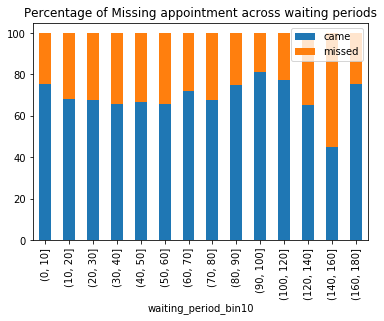

In [40]:
(waiting_period_10_count/waiting_period_10_count.groupby(level=0).sum()*100).unstack().plot(kind="bar",stacked=True)
plt.legend(['came','missed']);
plt.title("Percentage of Missing appointment across waiting periods")

> The percentage plot shows us the distributuion based on percentages. Here we can see that the percentage of people that came in for their appointments for each bin interval was greater than 50% for all appointment day intervals except for the period of 140 days to 160 days where the percentage of patients that came in for their appointments fell a little below 50%.

From this analysis, it can be said that waiting_period has no effect on whether the patient is absent or present.

### Research Question 2 : What other factors are important in the prediction of a patient's No-show status?


The other independent variables remaining on the edited dataset will then be plotted and analysed against the dependent variable (**absent**) to determine which is more useful for the prediction of a patient's turn up on the appointment day.  
The remaining variables include: 
+ age
+ neighbourhood
+ gender
+ scholarship
+ hypertensive
+ diabetic
+ alcoholic
+ received_sms
+ disabled

+ **Age**

In [41]:
bins=[0,10,20,30,40,50,60,70,80,90,100,110,120]
df['age_bin10'] = pd.cut(df.age, bins=bins)
age10_count = df.groupby('age_bin10')['absent'].value_counts()

In [42]:
age10_count

age_bin10   absent
(0, 10]     No        12050
            Yes        3146
(10, 20]    No         9758
            Yes        3304
(20, 30]    No        10379
            Yes        3392
(30, 40]    No        11799
            Yes        3228
(40, 50]    No        11534
            Yes        2868
(50, 60]    No        12926
            Yes        2713
(60, 70]    No         9522
            Yes        1645
(70, 80]    No         4823
            Yes         887
(80, 90]    No         2115
            Yes         394
(90, 100]   No          239
            Yes          59
(100, 110]  No            2
(110, 120]  Yes           3
            No            2
Name: absent, dtype: int64

Text(0.5,1,'Percentage of Missing appointment across ages')

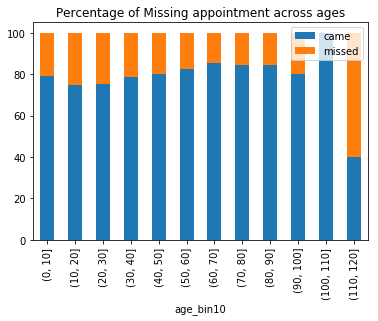

In [43]:
(age10_count/age10_count.groupby(level=0).sum()*100).unstack().plot(kind="bar",stacked=True)
plt.legend(['came','missed']);
plt.title("Percentage of Missing appointment across ages")

> From the above analysis done for age, people of all ages have a high percentage of being present for their appointments rather than being absent. Therefore, we can say that there is no predictive relationship between age and a patient being absent or present.

For the other independent variables, we will be using bar plots and percentage counts. For this reason, functions will be created for both to avoid repitition.

In [44]:
def categorical_bar_plot(df, predictor, variable, xlabel, ylabel, title):
    no_show = df[predictor] == "Yes"
    show = df[predictor] == "No"
    
    counts = df[variable].value_counts().to_dict()
    variable_cat = list(counts.keys())

    came = df[show][variable].value_counts()
    missed = df[no_show][variable].value_counts()

    width = 0.4
    values = np.arange(len(variable_cat))
    
    plt.figure(figsize=(20,10))

    plt.bar(values, came, width, label='came')
    plt.bar(values + width, missed, width, label='missed')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.xticks(values+0.2, variable_cat, rotation=90)
    plt.legend()
    plt.show()

In [45]:
def percentage(df, predictor, variable):
    perc = df.groupby([variable])[predictor].value_counts(normalize=True).round(4) * 100
    return perc

+ **Neighbourhood**

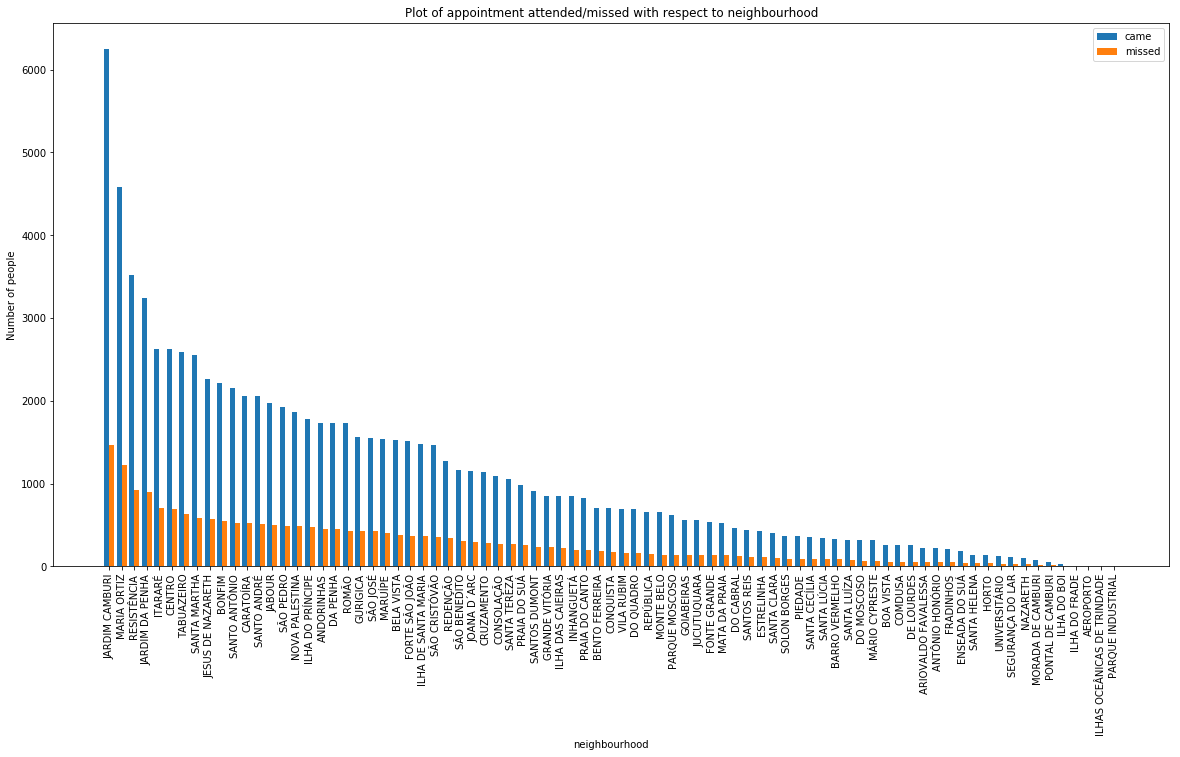

In [46]:
#plot of neighbourhood
categorical_bar_plot(df, predictor="absent", variable="neighbourhood", xlabel="neighbourhood", ylabel='Number of people', title="Plot of appointment attended/missed with respect to neighbourhood")

> The neighbourhood bar chart shows that some neighbourhoods have higher number of patients who booked appointments, but the number of absent patients is lower than the number of those who came in for their appointment and is proportional in all neighbourhoods when compared to the number of people who booked from each neighbourhood.  

The analysis shows no predictive relationship between a patients absent status and the neighbourhood.

+ **Gender**

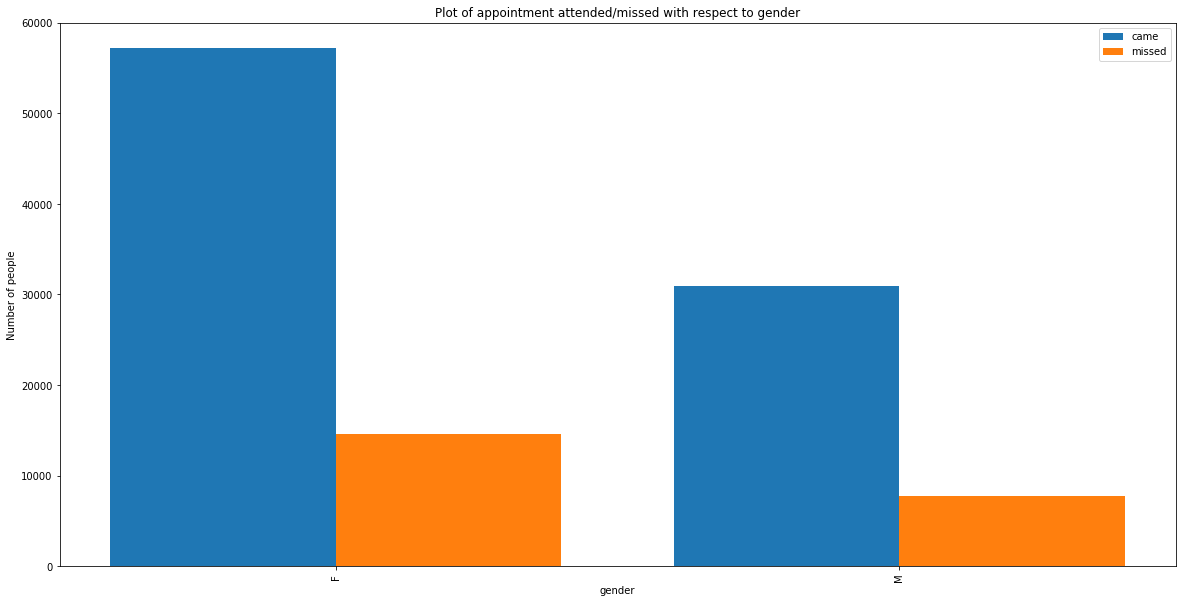

In [47]:
#plot of gender
categorical_bar_plot(df, predictor="absent", variable="gender", xlabel="gender", ylabel='Number of people', title="Plot of appointment attended/missed with respect to gender")

In [48]:
percentage(df, 'absent', 'gender')

gender  absent
F       No        79.69
        Yes       20.31
M       No        80.02
        Yes       19.98
Name: absent, dtype: float64

> More females booked for appointments thus the number of females who did not miss their appointments are higher, but when compared in percentages, the number of absent patients for both male and female are 20.31% and 19.98% respectively which is almost the same.  

The analysis shows no predictive relationship between a patients absent status and the gender.

+ **Scholarship**

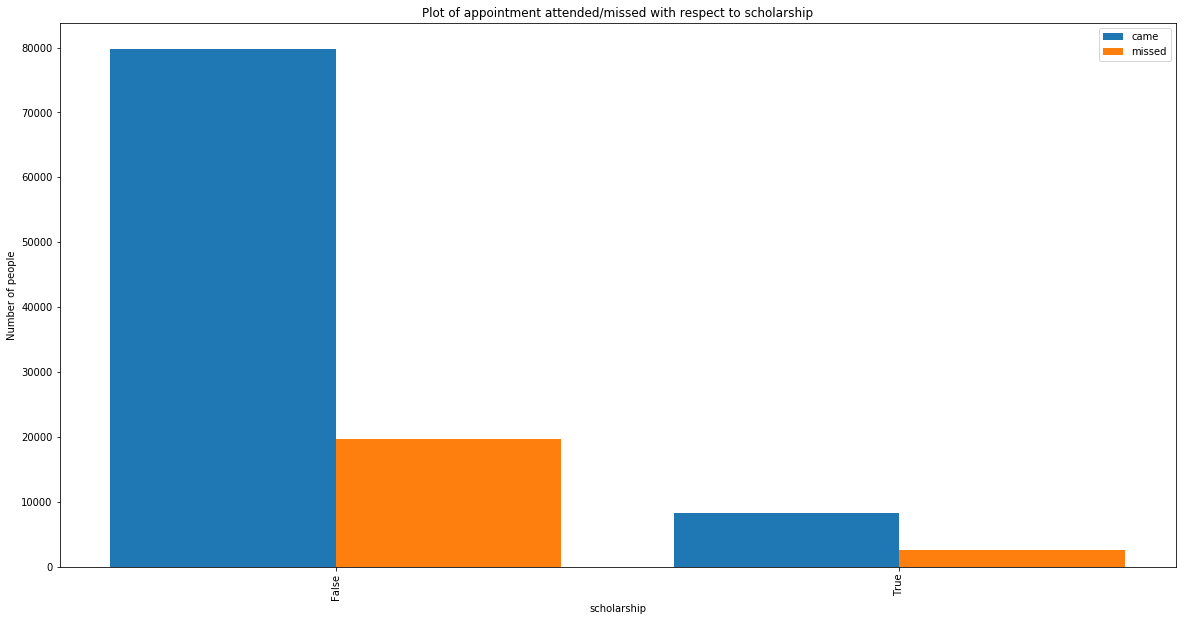

In [49]:
#plot of scholarship
categorical_bar_plot(df, predictor="absent", variable="scholarship", xlabel="scholarship", ylabel='Number of people', title="Plot of appointment attended/missed with respect to scholarship")

In [50]:
percentage(df, "absent", "scholarship")

scholarship  absent
False        No        80.20
             Yes       19.80
True         No        76.23
             Yes       23.77
Name: absent, dtype: float64

>From the percentage count, it is seen that the percentage of absent patients are on the same level for both those patients who have scholarships and those that do not irrespective of the total number.  

The analysis shows no predictive relationship between a patients absent status and scholarship status.

+ **Hypertensive**

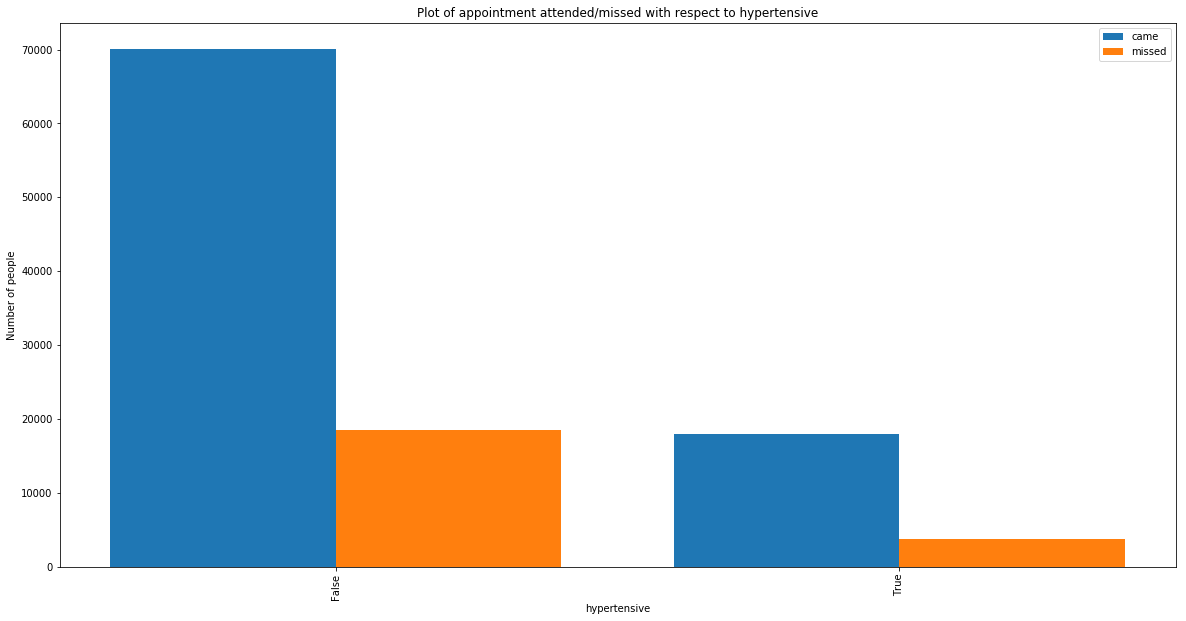

In [51]:
#plot of hypertensive
categorical_bar_plot(df, predictor="absent", variable="hypertensive", xlabel="hypertensive", ylabel='Number of people', title="Plot of appointment attended/missed with respect to hypertensive")

In [52]:
percentage(df, "absent", "hypertensive")

hypertensive  absent
False         No        79.09
              Yes       20.91
True          No        82.74
              Yes       17.26
Name: absent, dtype: float64

> The analysis shows no predictive relationship between a patients absent status and hypertensive status as both percentages of absent patients for the **True** and **False** sections are low (almost the same value).

+ **Diabetic**

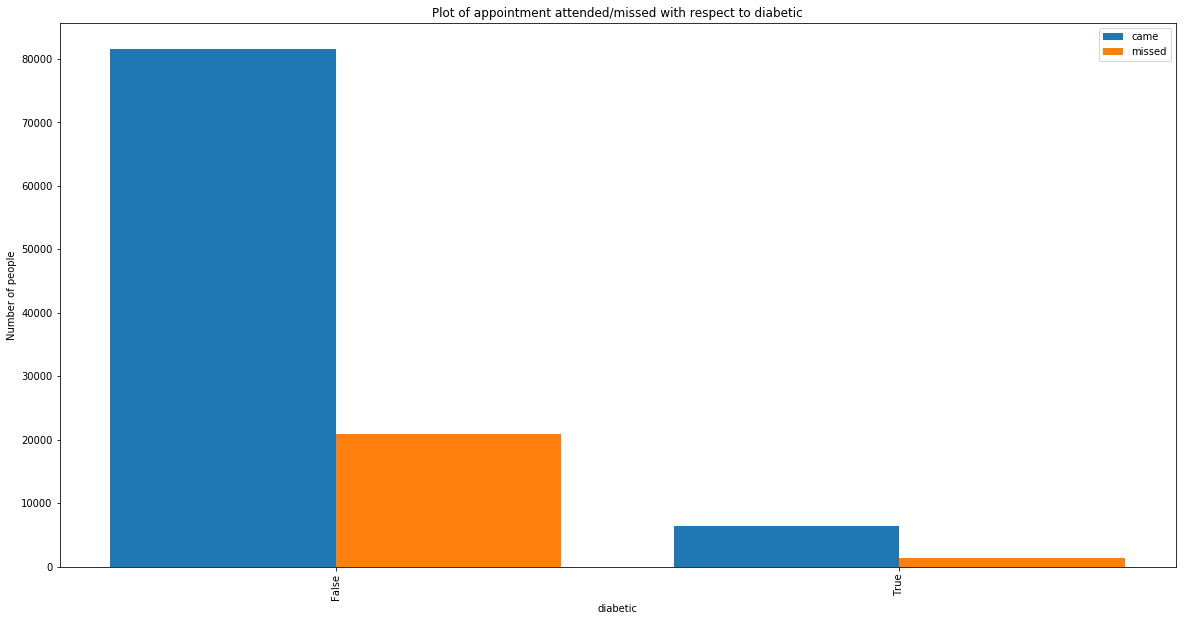

In [53]:
#plot of diabetic
categorical_bar_plot(df, predictor="absent", variable="diabetic", xlabel="diabetic", ylabel='Number of people', title="Plot of appointment attended/missed with respect to diabetic")

In [54]:
percentage(df, "absent", "diabetic")

diabetic  absent
False     No        79.64
          Yes       20.36
True      No        82.00
          Yes       18.00
Name: absent, dtype: float64

> The analysis shows no predictive relationship between a patients absent status and diabetic status as both percentages of absent patients for the **True** and **False** sections are low (almost the same value).

+ **Alcoholic**

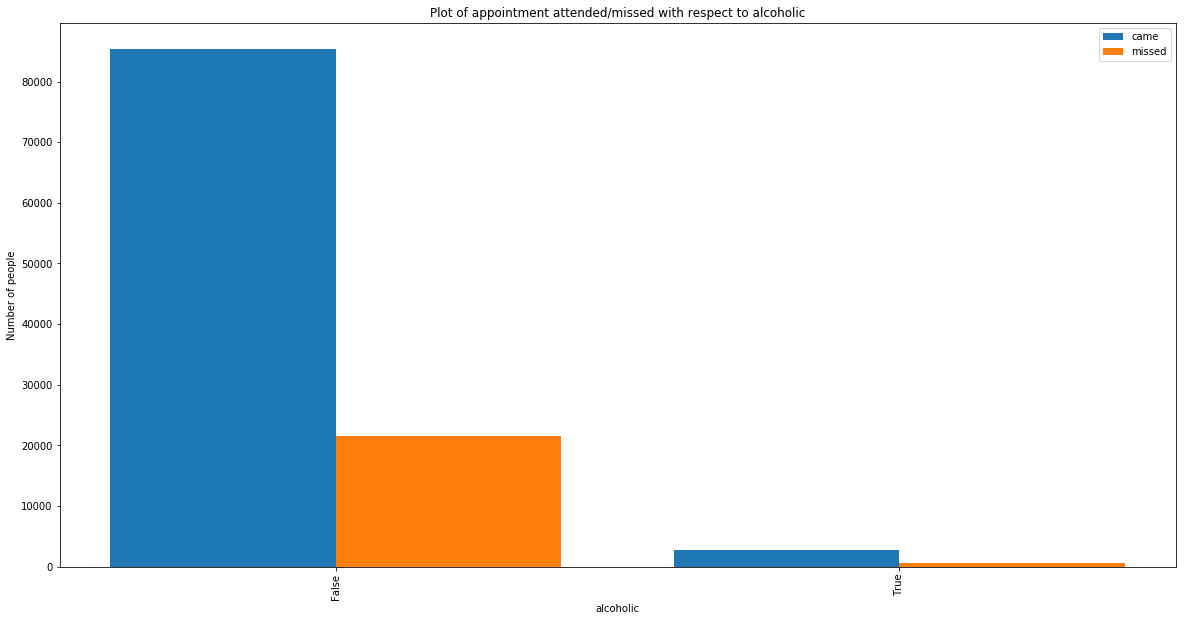

In [55]:
#plot of alcoholic
categorical_bar_plot(df, predictor="absent", variable="alcoholic", xlabel="alcoholic", ylabel='Number of people', title="Plot of appointment attended/missed with respect to alcoholic")

In [56]:
percentage(df, "absent", "alcoholic")

alcoholic  absent
False      No        79.81
           Yes       20.19
True       No        79.86
           Yes       20.14
Name: absent, dtype: float64

> The analysis shows no predictive relationship between a patients absent status and alcoholic status as both percentages of absent patients for the **True** and **False** sections are low and the same.

+ **SMS received**

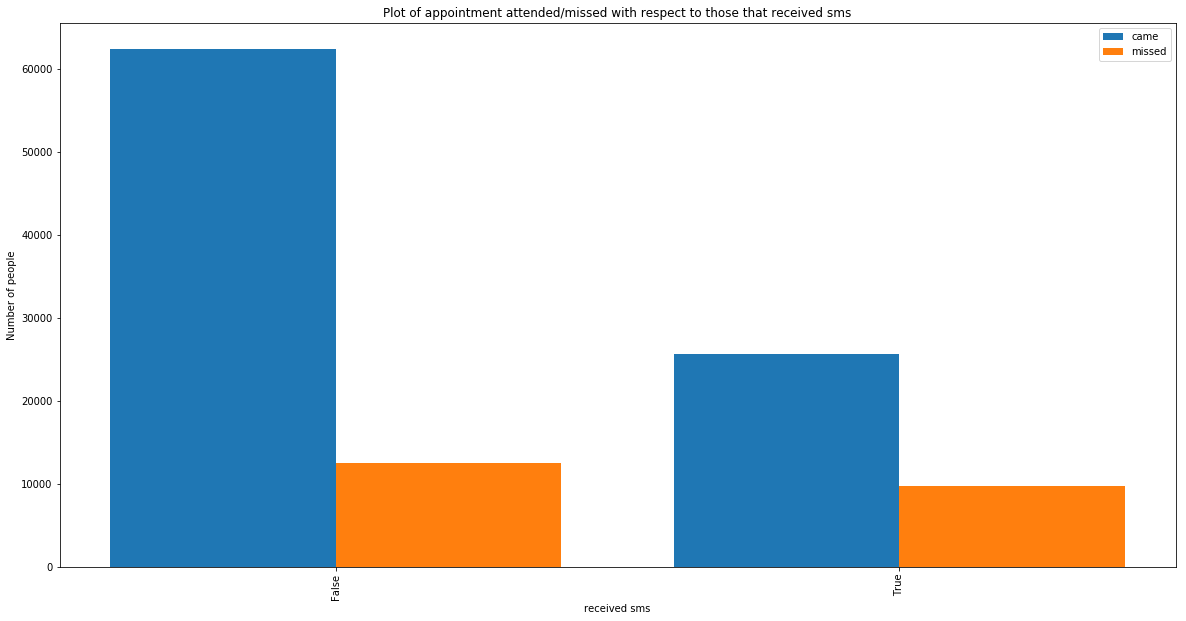

In [57]:
#plot of sms received
categorical_bar_plot(df, predictor="absent", variable="sms_received", xlabel="received sms", ylabel='Number of people', title="Plot of appointment attended/missed with respect to those that received sms")

In [58]:
percentage(df, "absent", "sms_received")

sms_received  absent
False         No        83.31
              Yes       16.69
True          No        72.41
              Yes       27.59
Name: absent, dtype: float64

> Here we see a slight difference.  
More of the patients who received an sms were absent in comparison to those who did not recieve any sms.

Thus it can be said that sending an sms does not ascertain that a patient will come in for their appointment and vice versa.

+ **Disabled**

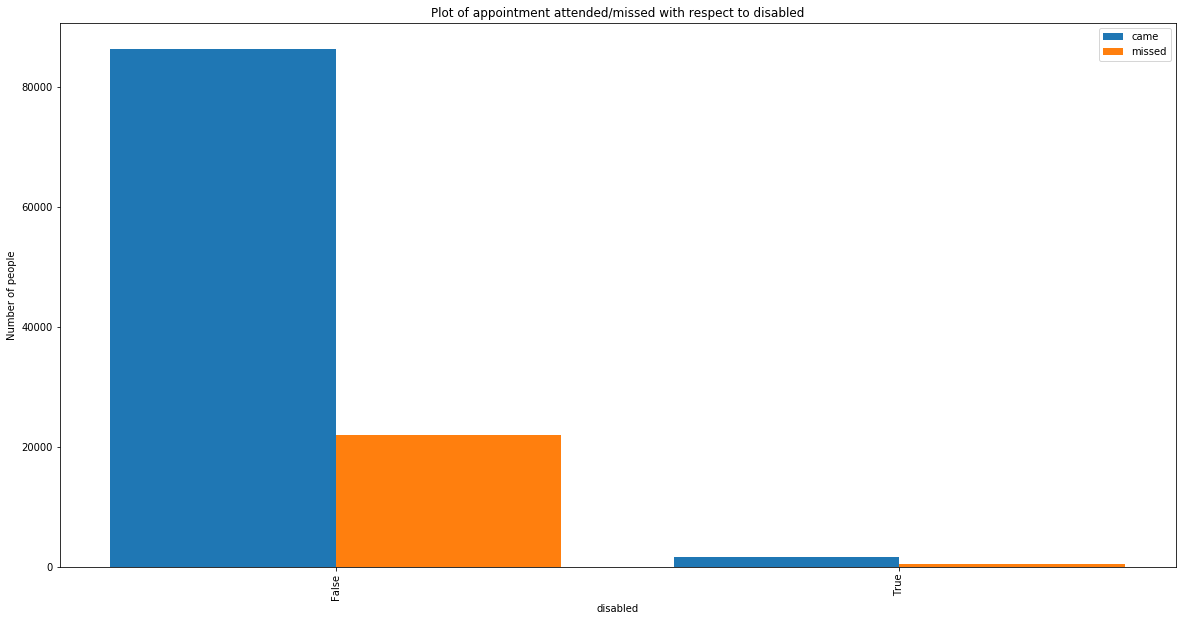

In [59]:
#plot of disabled
categorical_bar_plot(df, predictor="absent", variable="disabled", xlabel="disabled", ylabel='Number of people', title="Plot of appointment attended/missed with respect to disabled")

In [60]:
percentage(df, "absent", "disabled")

disabled  absent
False     No        79.76
          Yes       20.24
True      No        82.08
          Yes       17.92
Name: absent, dtype: float64

> The analysis shows no predictive relationship between a patients absent status and disabled status.

<a id='conclusions'></a>
## Conclusions and Limitations

### Conclusions  

+ Both ID columns were dropped as they were not needed for the analysis.

+ The analysis on the waiting time period (period between booking day and appointment day) shows that no matter the time period, more patients will show up. An error was however noticed with regards to those patients that were given dates that had already passed. More care should be taken when giving patients appointment days.

+ Analysis done on the other independent variables shows no significant importance on the prediction of whether a patient will show up for their appointment or not.

+ Further analysis should be done on new variables in order to get a predictive relationship.  


### Limitations  

+ Lack of essential information like the location of the hospital as this would have been used in conjuction with the neighbourhood variable to ascertain if the distance was also a factor for no show.  

+ Although the dataset did not have any missing values, it had some values that were either higher than the expected maximum value or lower than the expected minimum value, thus leading to an assumption that some of the collected entries were not so accurate.  

+ Apart from the age and the newly created waiting period variables which were numerical, other variables were qualitative thus making it more difficult to truly interpret and perform statistical analysis on, compared to quantitative data which is easier to see trends and relationships.

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0